<a href="https://colab.research.google.com/github/juninhoisrael/CaseTecnicoGeocalizacao/blob/main/Case_T%C3%A9cnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case
Uma empresa alimentícia situada no RJ deseja abrir filiais na cidade de
São Paulo, tendo como público alvo adultos de 25 a 50 anos, das
classes A (rendas A1 e A2) e B (rendas B1 e B2).
Essa empresa já atua no Rio de Janeiro e antes de fazer o investimento
quer estimar quanto poderia faturar em cada um dos bairros de São
Paulo também.
Como o mercado de São Paulo não é bem conhecido para essa
empresa, ela deseja classificar os bairros de São Paulo para saber se o
potencial é alto, médio ou baixo. Utilizando como base o potencial que
ela já conhece dos bairros do Rio de Janeiro.
Os analistas dessa empresa também gostariam de segmentar os bairros
de São Paulo de acordo com o perfil de renda e idade para direcionar
ações de marketing diferenciadas.
O contato dessa empresa também sinalizou que outras áreas da
empresa possuem problemas muito parecidos com esse e que também
devem procurar a Geofusion. Internamente também temos recebido
feedback da equipe comercial e eles dizem que outros clientes também
estão procurando soluções como essa e que poderíamos utilizar as
mesmas técnicas para criar um produto que resolva esse tipo de
problema.

1

Desafio Cientista de Dados
O Engenheiro de dados ajudou a extrair os dados de faturamento e
potencial dos bairros do Rio de Janeiro provenientes do nosso cliente,
juntamente com os dados de sociodemografia dos bairros do Rio de
Janeiro e São Paulo.
O CSV anexado possui esses dados para que você possa realizar as
suas análises.

Agora, monte uma análise dos bairros de São Paulo para:
1 - Estimar o faturamento que uma loja teria em cada um dos bairros
2 - Classificar o potencial de cada bairro como Alto, Médio ou Baixo
3 - Segmentar os bairros de São Paulo de acordo com a renda e a
idade, e indicar aqueles com maior aderência ao público alvo.
Como resultado da análise, é necessário que seja gerado um
documento (doc, pdf, ppt, etc) para pessoas não técnicas, apresentando
um racional de como os dados foram analisados. Utilize gráficos,
tabelas e descreva para apresentar as suas conclusões.
Dado que as técnicas aplicadas podem ser utilizadas para outros
clientes com problemas semelhantes, é necessário gerar também o
código que te levou a essa análise. Isso se faz necessário pois a
operacionalização será feita pelos nossos Engenheiros de Machine
Learning juntamente com o time de desenvolvedores. Dessa forma, é
necessário também o código que te levou às conclusões apresentadas.
Outra coisa que gostaríamos de ouvir de você é: dado a natureza do
problema apresentado, você conhece algum outro dado externo, de
fontes públicas ou de fontes privadas, que poderiam ser utilizados para
agregar mais valor para o resultado? Se sim, explique o por quê.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns # visualização dos dados
import matplotlib.pyplot as plt #viualização dos dados
import numpy as np  #biblioteca para trabalhar com computação numérica e vetores
import math # matematica
import pandas as pd  #biblioteca de manipulção dos dados
import scipy.stats as ss #biblioteca com funções de estatística
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importando os dados

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case geofusion/DadosDesafioCientista.xlxs")

In [ ]:
df.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3.304557e+09,Abolição,Rio de Janeiro,RJ,11676.0,1027.0,483.0,688.0,800.0,1675.0,...,145.0,715.0,1242.0,1093.0,758.0,92.0,304.0,2501.0,932515.0,Médio
1,3.304557e+09,Acari,Rio de Janeiro,RJ,27564.0,5131.0,2188.0,2697.0,2630.0,4810.0,...,0.0,82.0,506.0,2040.0,2490.0,827.0,2506.0,931.0,588833.0,Baixo
2,3.304557e+09,Água Santa,Rio de Janeiro,RJ,9003.0,883.0,399.0,597.0,762.0,1755.0,...,96.0,404.0,652.0,644.0,522.0,77.0,254.0,2391.0,874200.0,Baixo
3,3.304557e+09,Alto Da Boa Vista,Rio de Janeiro,RJ,9606.0,1072.0,538.0,660.0,685.0,1317.0,...,178.0,393.0,517.0,945.0,584.0,137.0,286.0,3727.0,912226.0,Médio
4,3.304557e+09,Anchieta,Rio de Janeiro,RJ,57222.0,7677.0,3774.0,4892.0,4600.0,8660.0,...,0.0,1089.0,2821.0,5110.0,5422.0,1073.0,3261.0,1380.0,553020.0,Médio


##Observação e Tratamento inicial dos dados


```



In [ ]:
df_mask=df['estado']=='RJ' #construindo dataset de treino
df_treino = df[df_mask]
df_treino

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3.304557e+09,Abolição,Rio de Janeiro,RJ,11676.0,1027.0,483.0,688.0,800.0,1675.0,...,145.0,715.0,1242.0,1093.0,758.0,92.0,304.0,2501.0,932515.0,Médio
1,3.304557e+09,Acari,Rio de Janeiro,RJ,27564.0,5131.0,2188.0,2697.0,2630.0,4810.0,...,0.0,82.0,506.0,2040.0,2490.0,827.0,2506.0,931.0,588833.0,Baixo
2,3.304557e+09,Água Santa,Rio de Janeiro,RJ,9003.0,883.0,399.0,597.0,762.0,1755.0,...,96.0,404.0,652.0,644.0,522.0,77.0,254.0,2391.0,874200.0,Baixo
3,3.304557e+09,Alto Da Boa Vista,Rio de Janeiro,RJ,9606.0,1072.0,538.0,660.0,685.0,1317.0,...,178.0,393.0,517.0,945.0,584.0,137.0,286.0,3727.0,912226.0,Médio
4,3.304557e+09,Anchieta,Rio de Janeiro,RJ,57222.0,7677.0,3774.0,4892.0,4600.0,8660.0,...,0.0,1089.0,2821.0,5110.0,5422.0,1073.0,3261.0,1380.0,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.304557e+09,Vila Kosmos,Rio de Janeiro,RJ,18791.0,1802.0,921.0,1442.0,1462.0,2500.0,...,259.0,774.0,1363.0,1923.0,1379.0,190.0,405.0,2316.0,901446.0,Médio
156,3.304557e+09,Vila Militar,Rio de Janeiro,RJ,13556.0,1888.0,787.0,1042.0,982.0,2542.0,...,219.0,714.0,828.0,1051.0,1012.0,116.0,465.0,2416.0,849731.0,Médio
157,3.304557e+09,Vila Valqueire,Rio de Janeiro,RJ,33190.0,3166.0,1619.0,2255.0,2326.0,4752.0,...,906.0,2866.0,2241.0,2982.0,1200.0,360.0,772.0,3189.0,1127042.0,Alto
158,3.304557e+09,Vista Alegre,Rio de Janeiro,RJ,8867.0,724.0,387.0,580.0,565.0,1205.0,...,87.0,556.0,836.0,940.0,484.0,75.0,214.0,2418.0,921875.0,Baixo


In [ ]:
df_mask1=df['estado']=='SP' #construindo dataset de teste
df_teste = df[df_mask1]
df_teste

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
160,355030251.0,A. E. Carvalho,São Paulo,SP,94034.0,12668.0,6853.0,9836.0,7487.0,14535.0,...,253.0,2197.0,4368.0,6681.0,7011.0,2247.0,5670.0,1501.0,NaN,NaN
161,35503020.0,Aclimação,São Paulo,SP,32791.0,2297.0,1017.0,2096.0,2197.0,5341.0,...,1734.0,3704.0,2351.0,1946.0,827.0,291.0,1617.0,5920.0,NaN,NaN
162,355030285.0,Adventista,São Paulo,SP,104193.0,15070.0,7343.0,10631.0,8657.0,17749.0,...,0.0,1423.0,4875.0,8595.0,10082.0,3111.0,5776.0,1284.0,NaN,NaN
163,35503088.0,Água Branca,São Paulo,SP,12721.0,953.0,343.0,627.0,819.0,2142.0,...,667.0,1558.0,1032.0,915.0,361.0,84.0,404.0,6278.0,NaN,NaN
164,35503066.0,Água Funda,São Paulo,SP,48417.0,5078.0,2396.0,4018.0,3571.0,7388.0,...,303.0,1794.0,2986.0,4489.0,2836.0,1104.0,2553.0,1905.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,355030213.0,Vila Sônia,São Paulo,SP,34061.0,2908.0,1462.0,2253.0,2076.0,4579.0,...,1089.0,2866.0,2219.0,2216.0,1227.0,306.0,1098.0,5285.0,NaN,NaN
452,355030207.0,Vila Suzana,São Paulo,SP,35403.0,4127.0,1890.0,2678.0,2433.0,5855.0,...,1522.0,2458.0,1186.0,1166.0,918.0,209.0,3840.0,7418.0,NaN,NaN
453,355030162.0,Vila Terezinha,São Paulo,SP,122359.0,18304.0,9304.0,13258.0,9965.0,19248.0,...,0.0,1758.0,4517.0,9450.0,11473.0,3218.0,7540.0,1252.0,NaN,NaN
454,355030157.0,Vila Zatt,São Paulo,SP,125864.0,14670.0,7305.0,11225.0,9338.0,18841.0,...,872.0,5093.0,8063.0,10012.0,8082.0,2856.0,6853.0,1936.0,NaN,NaN


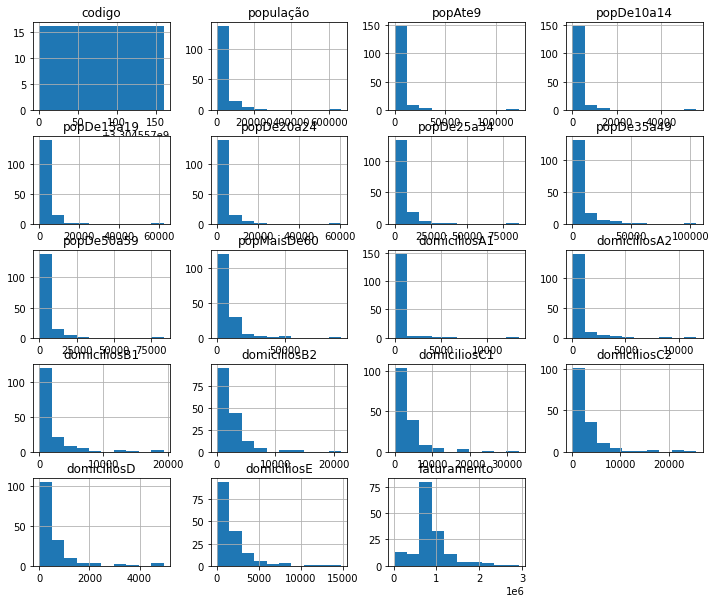

In [ ]:
df_treino.hist(figsize=(12,10));

O faturamento apresenta uma média de aproximadamente 1 milhão
a renda média por domicilio é menor que 5000,00.


In [ ]:
df.groupby ('potencial'). faturamento.mean (). reset_index () 


,potencial,faturamento
0,Alto,1.166706e+06
1,Baixo,7.819339e+05
2,Médio,7.140762e+05


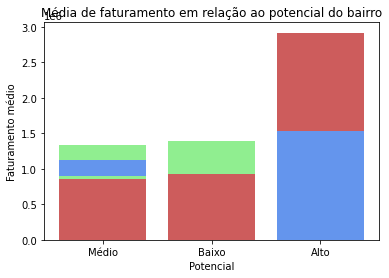

In [ ]:
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]
x = df_treino['potencial']
y = df_treino['faturamento']
plt.bar(x,y,color=cols);
plt.title('Média de faturamento em relação ao potencial do bairro');
plt.xlabel('Potencial');
plt.ylabel('Faturamento médio');

Algum outlier pode ter afetado essa análise. Mas uma média de faturamento alta maior num potencial médio não está de acordo.

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    float64
 1   nome          160 non-null    object 
 2   cidade        160 non-null    object 
 3   estado        160 non-null    object 
 4   população     160 non-null    float64
 5   popAte9       160 non-null    float64
 6   popDe10a14    160 non-null    float64
 7   popDe15a19    160 non-null    float64
 8   popDe20a24    160 non-null    float64
 9   popDe25a34    160 non-null    float64
 10  popDe35a49    160 non-null    float64
 11  popDe50a59    160 non-null    float64
 12  popMaisDe60   160 non-null    float64
 13  domiciliosA1  160 non-null    float64
 14  domiciliosA2  160 non-null    float64
 15  domiciliosB1  160 non-null    float64
 16  domiciliosB2  160 non-null    float64
 17  domiciliosC1  160 non-null    float64
 18  domiciliosC2  160 non-null    

In [ ]:
df_teste.head(296)

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
160,355030251.0,A. E. Carvalho,São Paulo,SP,94034.0,12668.0,6853.0,9836.0,7487.0,14535.0,...,253.0,2197.0,4368.0,6681.0,7011.0,2247.0,5670.0,1501.0,NaN,NaN
161,35503020.0,Aclimação,São Paulo,SP,32791.0,2297.0,1017.0,2096.0,2197.0,5341.0,...,1734.0,3704.0,2351.0,1946.0,827.0,291.0,1617.0,5920.0,NaN,NaN
162,355030285.0,Adventista,São Paulo,SP,104193.0,15070.0,7343.0,10631.0,8657.0,17749.0,...,0.0,1423.0,4875.0,8595.0,10082.0,3111.0,5776.0,1284.0,NaN,NaN
163,35503088.0,Água Branca,São Paulo,SP,12721.0,953.0,343.0,627.0,819.0,2142.0,...,667.0,1558.0,1032.0,915.0,361.0,84.0,404.0,6278.0,NaN,NaN
164,35503066.0,Água Funda,São Paulo,SP,48417.0,5078.0,2396.0,4018.0,3571.0,7388.0,...,303.0,1794.0,2986.0,4489.0,2836.0,1104.0,2553.0,1905.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,355030213.0,Vila Sônia,São Paulo,SP,34061.0,2908.0,1462.0,2253.0,2076.0,4579.0,...,1089.0,2866.0,2219.0,2216.0,1227.0,306.0,1098.0,5285.0,NaN,NaN
452,355030207.0,Vila Suzana,São Paulo,SP,35403.0,4127.0,1890.0,2678.0,2433.0,5855.0,...,1522.0,2458.0,1186.0,1166.0,918.0,209.0,3840.0,7418.0,NaN,NaN
453,355030162.0,Vila Terezinha,São Paulo,SP,122359.0,18304.0,9304.0,13258.0,9965.0,19248.0,...,0.0,1758.0,4517.0,9450.0,11473.0,3218.0,7540.0,1252.0,NaN,NaN
454,355030157.0,Vila Zatt,São Paulo,SP,125864.0,14670.0,7305.0,11225.0,9338.0,18841.0,...,872.0,5093.0,8063.0,10012.0,8082.0,2856.0,6853.0,1936.0,NaN,NaN


## Limpeza e tratamento inicial dos dados

In [ ]:
df_treino['rendaMedia'] = df_treino['rendaMedia'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_teste = df_teste.drop([232,361,376])
df_teste['rendaMedia'] = df_teste['rendaMedia'].astype(float)

In [ ]:
dfTreino_clean = df_treino.drop(['cidade', 'estado'], axis=1)

In [ ]:
dfTeste_clean = df_teste.drop(['cidade', 'estado'], axis=1)

Como cidade e estado possuem valores fixos e temos o código dos bairros, podemos eliminá-los.

## 1ª Análise Exploratória dos Dados

In [ ]:
dfTreino_clean.describe()

,codigo,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,...,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,LogFaturamento,domiciliosA,domiciliosB,publicoalvo
count,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000
mean,3.304557e+09,28426.393103,3337.156463,1596.459459,2114.602740,2133.000000,4380.305556,5945.625000,3873.373333,5441.406667,...,2141.906040,371.540541,1271.530612,3608.071429,8.761600e+05,1.012500,13.505688,996.743750,2882.528589,10325.930556
std,4.633213e+01,19234.011411,2524.889254,1205.545673,1545.655772,1457.839023,2967.925337,3938.483329,2828.804674,4045.993709,...,1697.538863,318.935284,1034.940853,5975.819147,4.382106e+05,0.784981,0.742351,2883.720322,2015.383661,6763.904269
min,3.304557e+09,173.000000,33.000000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,...,3.000000,0.000000,2.000000,654.000000,2.465100e+04,0.000000,10.112573,0.000000,0.000000,66.000000
25%,3.304557e+09,13362.750000,1512.750000,690.750000,945.000000,994.750000,2131.250000,2900.750000,1598.750000,2118.250000,...,789.750000,117.750000,431.500000,1498.000000,7.112785e+05,0.000000,13.474819,0.000000,1228.500000,5152.000000
50%,3.304557e+09,26076.000000,3111.500000,1434.000000,2015.000000,2132.000000,4170.500000,5657.000000,3371.500000,4575.500000,...,1861.500000,327.500000,1042.500000,1944.000000,8.242285e+05,1.000000,13.622202,109.500000,2493.000000,9767.500000
75%,3.304557e+09,39565.500000,4311.750000,2137.750000,2714.500000,2829.000000,6039.000000,8354.000000,5544.750000,7788.500000,...,2955.000000,500.500000,1717.750000,3114.000000,9.343208e+05,2.000000,13.747575,494.500000,4376.250000,14615.500000
max,3.304557e+09,88426.000000,11784.000000,5474.000000,7144.000000,6855.000000,14629.000000,18262.000000,12713.000000,18768.000000,...,7929.000000,1402.000000,4395.000000,63887.000000,2.915612e+06,2.000000,14.885590,25076.000000,8075.000000,31693.000000


Todas as variáveis apresentam outliers. Que afetam diretamente na média.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


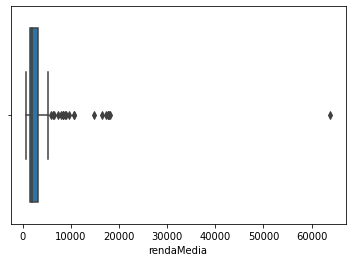

In [ ]:
sns.boxplot(dfTreino_clean['rendaMedia'])

Temos muitos outliers no dataset

## 2ª Tratamento dos dados

In [ ]:
for x in ['população', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59',
          'popMaisDe60','domiciliosB1',
          'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia']: #tratamento de outlier
    q75,q25 = np.percentile(dfTreino_clean.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dfTreino_clean.loc[dfTreino_clean[x] < min,x] = np.nan
    dfTreino_clean.loc[dfTreino_clean[x] > max,x] = np.nan

In [ ]:
for x in ['população', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59',
          'popMaisDe60','domiciliosB1',
          'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia']: #tratamento de outlier
    q75,q25 = np.percentile(dfTeste_clean.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dfTeste_clean.loc[dfTeste_clean[x] < min,x] = np.nan
    dfTeste_clean.loc[dfTeste_clean[x] > max,x] = np.nan

In [ ]:
dfTreino_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        160 non-null    float64
 1   nome          160 non-null    object 
 2   população     145 non-null    float64
 3   popAte9       147 non-null    float64
 4   popDe10a14    148 non-null    float64
 5   popDe15a19    146 non-null    float64
 6   popDe20a24    144 non-null    float64
 7   popDe25a34    144 non-null    float64
 8   popDe35a49    144 non-null    float64
 9   popDe50a59    150 non-null    float64
 10  popMaisDe60   150 non-null    float64
 11  domiciliosA1  160 non-null    float64
 12  domiciliosA2  160 non-null    float64
 13  domiciliosB1  142 non-null    float64
 14  domiciliosB2  151 non-null    float64
 15  domiciliosC1  147 non-null    float64
 16  domiciliosC2  149 non-null    float64
 17  domiciliosD   148 non-null    float64
 18  domiciliosE   147 non-null    

In [ ]:
for y in ['população', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59',
          'popMaisDe60','domiciliosB1',
          'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia']:
    dfTreino_clean[y].fillna((dfTreino_clean[y].mean()), inplace=True)

In [ ]:
for y in ['população', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59',
          'popMaisDe60','domiciliosB1',
          'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia']:
    dfTeste_clean[y].fillna((dfTeste_clean[y].mean()), inplace=True)

In [ ]:
df_treino2 = dfTreino_clean

In [ ]:
df_teste2 = dfTeste_clean

A empresa contratante especificou o público para 25 a 50 anos.

In [ ]:
df_treino2.describe()

,codigo,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,...,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,LogFaturamento,domiciliosA,domiciliosB,publicoalvo
count,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000
mean,3.304557e+09,26645.250945,2932.020093,1442.179827,1890.075252,1965.909091,4030.739538,5642.461538,3608.966022,5281.177637,...,1951.973808,327.233464,1144.875150,2058.801644,8.761600e+05,1.012500,13.505688,996.743750,2882.528589,10325.930556
std,4.633213e+01,16451.176953,1881.976395,961.993291,1190.098515,1183.296054,2370.916330,3449.166744,2411.966127,3784.639198,...,1393.747760,252.370934,846.159283,858.296427,4.382106e+05,0.784981,0.742351,2883.720322,2015.383661,6763.904269
min,3.304557e+09,173.000000,33.000000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,...,3.000000,0.000000,2.000000,654.000000,2.465100e+04,0.000000,10.112573,0.000000,0.000000,66.000000
25%,3.304557e+09,13362.750000,1512.750000,690.750000,945.000000,994.750000,2131.250000,2900.750000,1598.750000,2118.250000,...,789.750000,117.750000,431.500000,1498.000000,7.112785e+05,0.000000,13.474819,0.000000,1228.500000,5152.000000
50%,3.304557e+09,26076.000000,2932.020093,1434.000000,1890.075252,1965.909091,4030.739538,5642.461538,3371.500000,4575.500000,...,1861.500000,326.616732,1042.500000,1944.000000,8.242285e+05,1.000000,13.622202,109.500000,2493.000000,9767.500000
75%,3.304557e+09,37271.000000,3755.000000,1906.750000,2496.750000,2596.000000,5649.500000,8047.000000,5032.500000,7450.500000,...,2658.750000,428.500000,1585.250000,2316.250000,9.343208e+05,2.000000,13.747575,494.500000,4376.250000,14615.500000
max,3.304557e+09,72501.000000,8181.000000,4258.000000,5257.000000,5418.000000,10923.000000,15618.000000,10862.000000,15430.000000,...,6086.000000,1073.000000,3563.000000,5324.000000,2.915612e+06,2.000000,14.885590,25076.000000,8075.000000,31693.000000


In [ ]:
#Variavel de interesse
target = 'faturamento'
target2 = 'LogFaturamento'
print('faturamento:', target)
print('LogFaturamento:', target2)
# Variaveis numericas
num_vars = df_treino2.select_dtypes(include=['float']).columns.tolist()
num_vars.remove('codigo')
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

faturamento: faturamento
LogFaturamento: LogFaturamento
numerical vars(22): ['população', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia', 'LogFaturamento', 'domiciliosA', 'domiciliosB', 'publicoalvo']


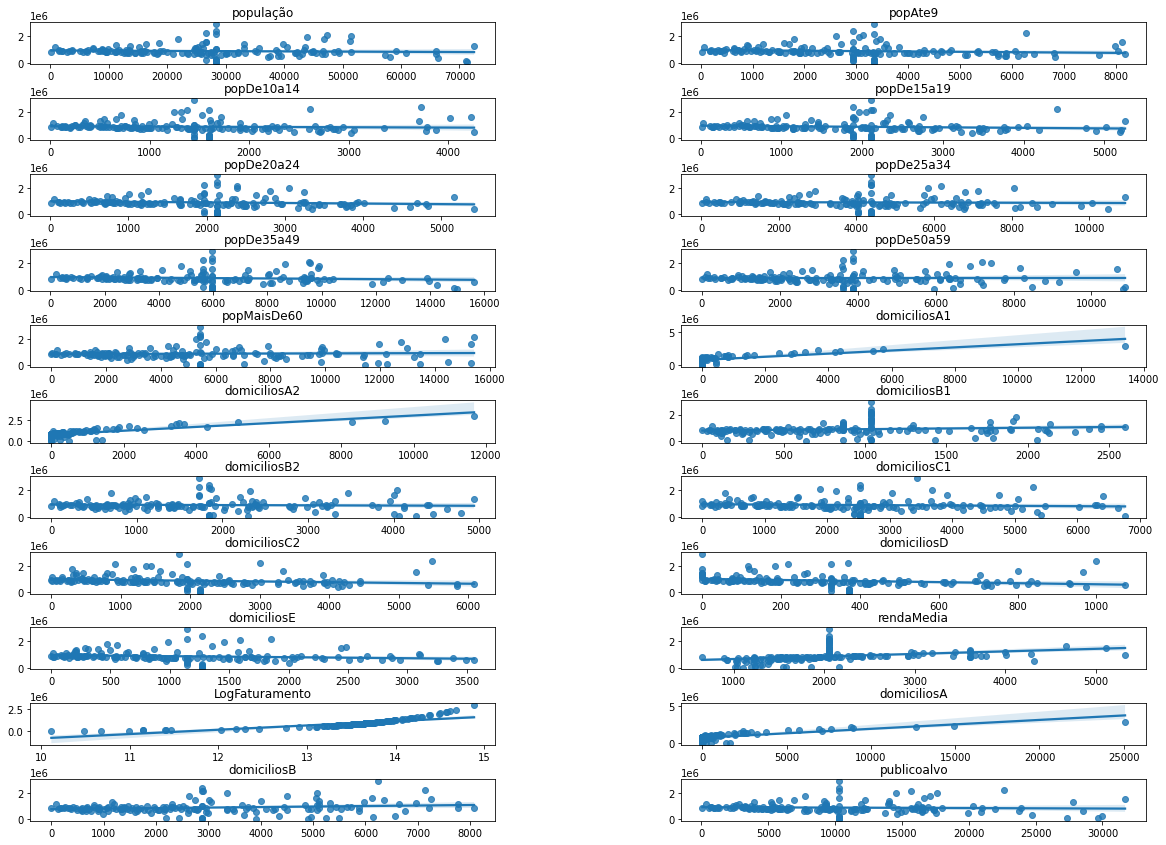

In [ ]:
# Configurando a figura do matplot lib
fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

total_plots = len(num_vars)
i = 0
# Iterando para todas variaveis categoricas
for var in num_vars:
    # Pegando o index certo para plotar o grafico
    ax = fig.add_subplot(total_plots, 2, i+1)
    # Desenhando o grafico do tipo violinplot
    sns.regplot(x=var, y=target, data=df_treino2, ax=ax )
    ax.set_title(var)
    ax.set_ylabel('')
    ax.set_xlabel('')
    i += 1

plt.show()

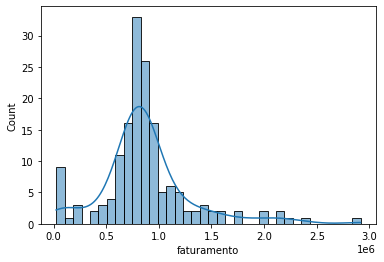

In [ ]:
sns.histplot(x=df_treino2.faturamento, kde=True)

In [ ]:
df_treino2['LogFaturamento'] = np.log(df_treino2['faturamento'].values) #transformação para tornar a distribuição mais fácil de trabalhar

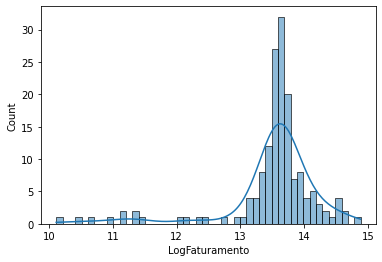

In [ ]:
sns.histplot(x=df_treino2.LogFaturamento, kde=True)

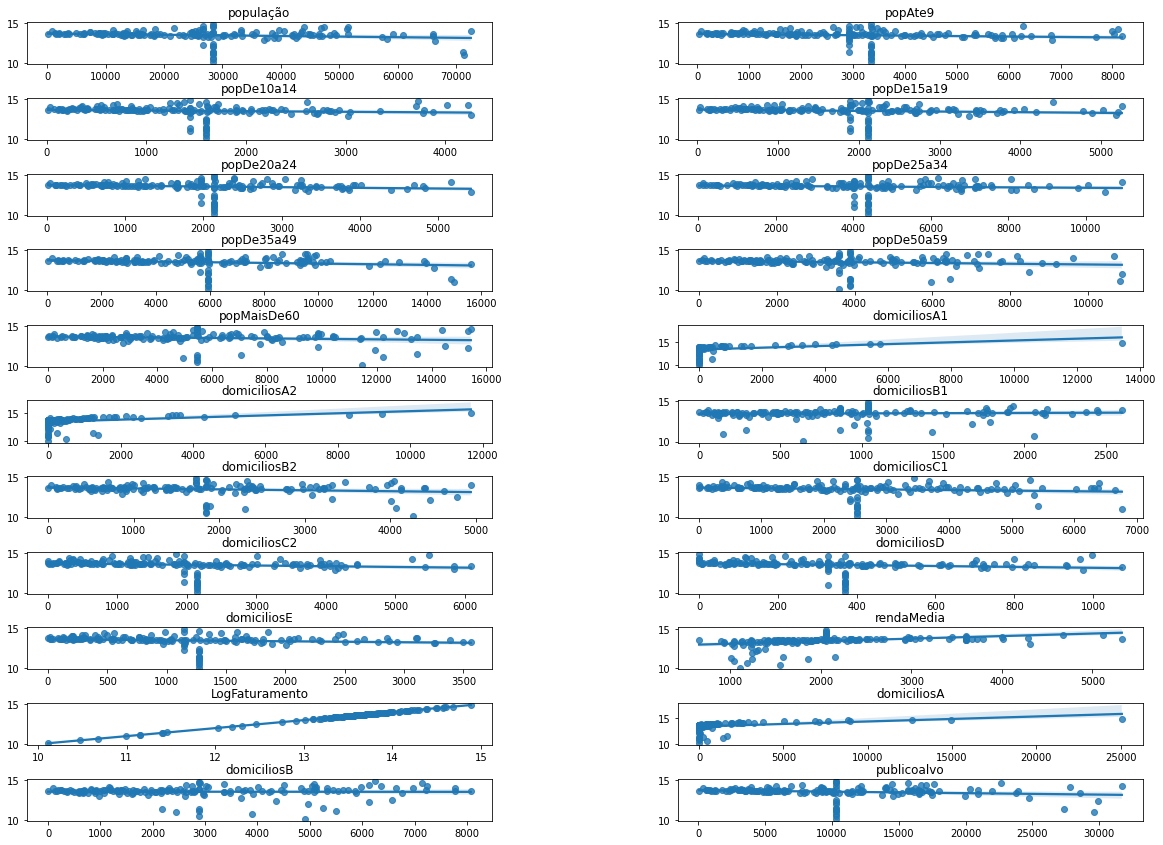

In [ ]:
# Configurando a figura do matplot lib
fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

total_plots = len(num_vars)
i = 0
# Iterando para todas variaveis categoricas
for var in num_vars:
    # Pegando o index certo para plotar o grafico
    ax = fig.add_subplot(total_plots, 2, i+1)
    # Desenhando o grafico do tipo violinplot
    sns.regplot(x=var, y=target2, data=df_treino2, ax=ax )
    ax.set_title(var)
    ax.set_ylabel('')
    ax.set_xlabel('')
    i += 1

plt.show()

O faturamento parece ser bastante influenciado pela renda média. Sendo diretamente proporcional.
Apresenta estabilidade entre a população para todas as faixas etárias.
Para classes do tipo A e B o faturamento, por estar bem correlacionado com a renda, também apresenta crescimento proporcional.

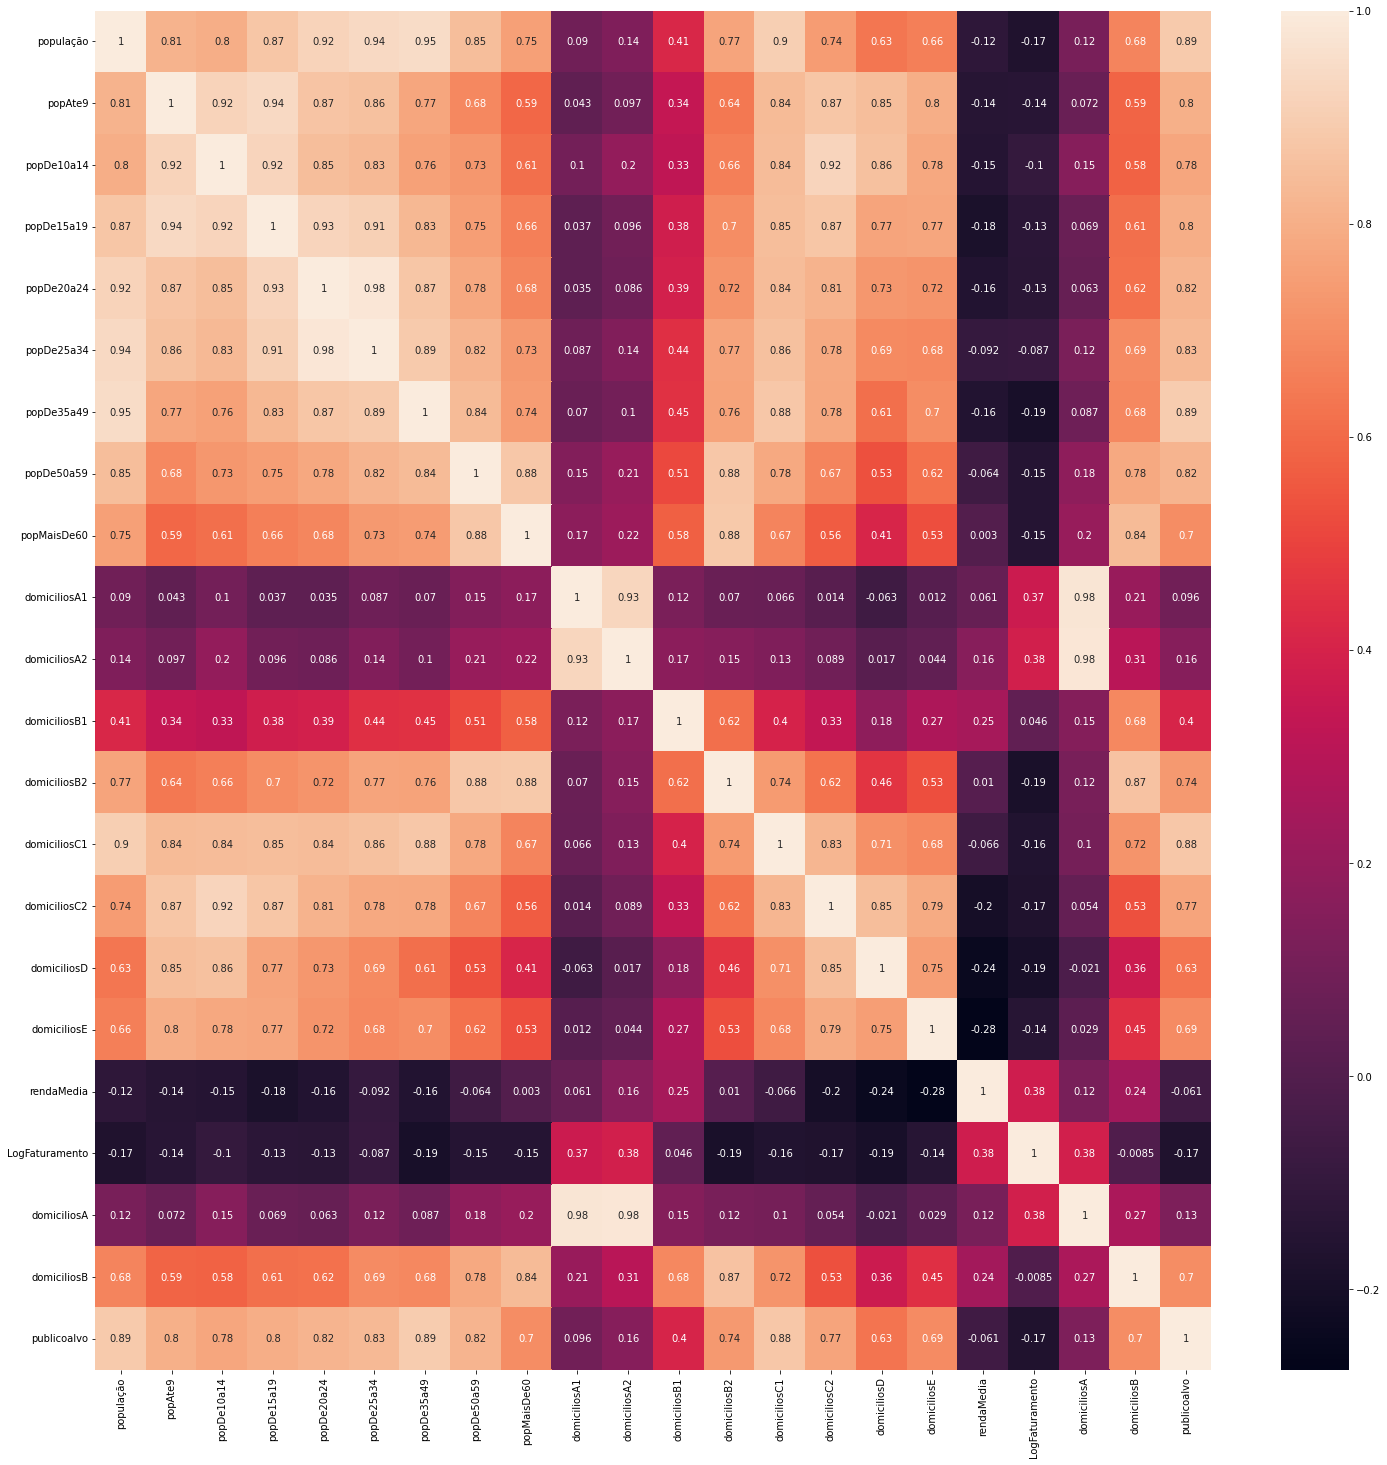

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df_treino2[num_vars].corr(),annot=True)
plt.show()

A faixa etária entre 25 e 49 anos é a que apresenta a maior correlação negativa
 Seria interessante investigar o porquê disso acontecer.

In [ ]:
df_treino2['domiciliosA'] = df_treino2['domiciliosA1'] + df_treino2['domiciliosA2']
df_treino2['domiciliosB'] = df_treino2['domiciliosB1'] + df_treino2['domiciliosB2']
df_treino2["publicoalvo"] = df_treino2['popDe35a49'] + df_treino2['popDe25a34']


In [ ]:
df_teste2['domiciliosA'] = df_teste2['domiciliosA1'] + df_teste2['domiciliosA2']
df_teste2['domiciliosB'] = df_teste2['domiciliosB1'] + df_teste2['domiciliosB2']
df_teste2["publicoalvo"] = df_teste2['popDe35a49'] + df_teste2['popDe25a34']

In [ ]:
corr_matrix = df_treino2[num_vars + [target]].corr()
corr_matrix[target].sort_values(ascending=False)

faturamento       1.000000
LogFaturamento    0.818690
domiciliosA       0.784260
domiciliosA2      0.783591
domiciliosA1      0.754193
rendaMedia        0.377822
domiciliosB1      0.150618
popMaisDe60       0.043305
domiciliosB       0.019730
popDe50a59        0.004701
popDe25a34       -0.037330
domiciliosB2     -0.049388
popDe10a14       -0.053782
população        -0.062326
publicoalvo      -0.079892
domiciliosC1     -0.090863
popDe35a49       -0.105385
popDe15a19       -0.109684
popAte9          -0.114820
popDe20a24       -0.116936
domiciliosE      -0.149002
domiciliosC2     -0.180112
domiciliosD      -0.233266
Name: faturamento, dtype: float64

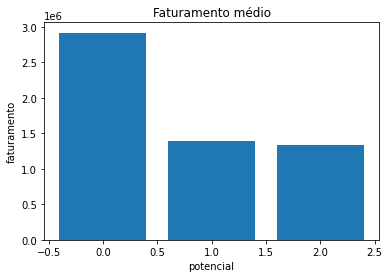

In [ ]:
x =df_treino2['potencial']
y=df_treino2['faturamento']
plt.bar(x,y);
plt.title('Faturamento médio');
plt.xlabel('potencial');
plt.ylabel('faturamento');

In [ ]:
df_treino2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo          160 non-null    float64
 1   nome            160 non-null    object 
 2   população       160 non-null    float64
 3   popAte9         160 non-null    float64
 4   popDe10a14      160 non-null    float64
 5   popDe15a19      160 non-null    float64
 6   popDe20a24      160 non-null    float64
 7   popDe25a34      160 non-null    float64
 8   popDe35a49      160 non-null    float64
 9   popDe50a59      160 non-null    float64
 10  popMaisDe60     160 non-null    float64
 11  domiciliosA1    160 non-null    float64
 12  domiciliosA2    160 non-null    float64
 13  domiciliosB1    160 non-null    float64
 14  domiciliosB2    160 non-null    float64
 15  domiciliosC1    160 non-null    float64
 16  domiciliosC2    160 non-null    float64
 17  domiciliosD     160 non-null    flo

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_lr = df_treino2
df_lr['potencial'] = le.fit_transform(df_lr['potencial'])
df_lr

,codigo,nome,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,...,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,LogFaturamento,domiciliosA,domiciliosB,publicoalvo
0,3.304557e+09,Abolição,11676.0,1027.0,483.0,688.0,800.0,1675.0,2300.0,1784.0,...,758.0,92.0,304.0,2501.0,932515.0,2,13.745641,145.0,1957.0,3975.0
1,3.304557e+09,Acari,27564.0,5131.0,2188.0,2697.0,2630.0,4810.0,5308.0,2403.0,...,2490.0,827.0,2506.0,931.0,588833.0,1,13.285898,0.0,588.0,10118.0
2,3.304557e+09,Água Santa,9003.0,883.0,399.0,597.0,762.0,1755.0,2076.0,1112.0,...,522.0,77.0,254.0,2391.0,874200.0,1,13.681064,96.0,1056.0,3831.0
3,3.304557e+09,Alto Da Boa Vista,9606.0,1072.0,538.0,660.0,685.0,1317.0,2007.0,1341.0,...,584.0,137.0,286.0,3727.0,912226.0,2,13.723643,292.0,910.0,3324.0
4,3.304557e+09,Anchieta,57222.0,7677.0,3774.0,4892.0,4600.0,8660.0,12272.0,7157.0,...,5422.0,1073.0,3261.0,1380.0,553020.0,2,13.223149,0.0,3910.0,20932.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.304557e+09,Vila Kosmos,18791.0,1802.0,921.0,1442.0,1462.0,2500.0,3944.0,2920.0,...,1379.0,190.0,405.0,2316.0,901446.0,2,13.711755,259.0,2137.0,6444.0
156,3.304557e+09,Vila Militar,13556.0,1888.0,787.0,1042.0,982.0,2542.0,2908.0,1528.0,...,1012.0,116.0,465.0,2416.0,849731.0,2,13.652675,219.0,1542.0,5450.0
157,3.304557e+09,Vila Valqueire,33190.0,3166.0,1619.0,2255.0,2326.0,4752.0,7183.0,4950.0,...,1200.0,360.0,772.0,3189.0,1127042.0,0,13.935107,906.0,5107.0,11935.0
158,3.304557e+09,Vista Alegre,8867.0,724.0,387.0,580.0,565.0,1205.0,1812.0,1474.0,...,484.0,75.0,214.0,2418.0,921875.0,1,13.734165,87.0,1392.0,3017.0


In [ ]:
df_lr2 = df_teste2

In [ ]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo          160 non-null    float64
 1   nome            160 non-null    object 
 2   população       160 non-null    float64
 3   popAte9         160 non-null    float64
 4   popDe10a14      160 non-null    float64
 5   popDe15a19      160 non-null    float64
 6   popDe20a24      160 non-null    float64
 7   popDe25a34      160 non-null    float64
 8   popDe35a49      160 non-null    float64
 9   popDe50a59      160 non-null    float64
 10  popMaisDe60     160 non-null    float64
 11  domiciliosA1    160 non-null    float64
 12  domiciliosA2    160 non-null    float64
 13  domiciliosB1    160 non-null    float64
 14  domiciliosB2    160 non-null    float64
 15  domiciliosC1    160 non-null    float64
 16  domiciliosC2    160 non-null    float64
 17  domiciliosD     160 non-null    flo

## Regressão linear

In [ ]:
# Montando a formula da regressao linear para toda população
lr_vars = ['publicoalvo', 'domiciliosA', 'domiciliosB', 'domiciliosD','população','domiciliosC2','popDe20a24', 'popDe10a14', 
            'rendaMedia',"potencial",'domiciliosE','domiciliosC1','popDe15a19','popMaisDe60','popAte9'] 
formula ="faturamento ~ " + ' + '.join(lr_vars)


# Criando o modelo de regressão linear
model = smf.ols(formula = formula, data = df_lr).fit()

# Plotando o sumario do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            faturamento   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     30.05
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           6.60e-37
Time:                        00:02:31   Log-Likelihood:                -2191.5
No. Observations:                 160   AIC:                             4415.
Df Residuals:                     144   BIC:                             4464.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      6.81e+05    8.2e+04      8.306   

## Modelo para prever faturamento

In [ ]:
from sklearn.preprocessing import StandardScaler #padronizar os valores dos dados para minimizar erros.
scaler = StandardScaler()

In [ ]:
X = df_lr[['publicoalvo', 'domiciliosA', 'domiciliosB', 'domiciliosD','população','domiciliosC2','popDe20a24', 'popDe10a14', 
            'rendaMedia','domiciliosE','domiciliosC1','popDe15a19','popMaisDe60','popAte9']] #Base de treino
Y = df_treino['faturamento'] #target de treino
Xteste = df_lr2[['publicoalvo', 'domiciliosA', 'domiciliosB', 'domiciliosD','população','domiciliosC2','popDe20a24', 'popDe10a14', 
            'rendaMedia','domiciliosE','domiciliosC1','popDe15a19','popMaisDe60','popAte9']] #base de teste

In [ ]:
X_scaled = scaler.fit_transform(X)
X_scaled_test = scaler.transform(Xteste)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, subsample=1.0, 
                                min_samples_split=8, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=5, min_impurity_decrease=0.0,
                                init=None, random_state=42, max_features=12, alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                warm_start=False, validation_fraction=0.4, n_iter_no_change=None, tol=0.001, ccp_alpha=0.0)
gbr.fit(X_scaled, Y)

y_test_gbr_pred = gbr.predict(X_scaled_test)

In [ ]:
faturamento_sp = df_teste
faturamento_sp['faturamento'] = y_test_gbr_pred

In [ ]:
faturamento_sp.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
160,355030251.0,A. E. Carvalho,São Paulo,SP,94034.0,12668.0,6853.0,9836.0,7487.0,14535.0,...,253.0,2197.0,4368.0,6681.0,7011.0,2247.0,5670.0,1501.0,6.247941e+05,NaN
161,35503020.0,Aclimação,São Paulo,SP,32791.0,2297.0,1017.0,2096.0,2197.0,5341.0,...,1734.0,3704.0,2351.0,1946.0,827.0,291.0,1617.0,5920.0,1.480616e+06,NaN
162,355030285.0,Adventista,São Paulo,SP,104193.0,15070.0,7343.0,10631.0,8657.0,17749.0,...,0.0,1423.0,4875.0,8595.0,10082.0,3111.0,5776.0,1284.0,3.974932e+05,NaN
163,35503088.0,Água Branca,São Paulo,SP,12721.0,953.0,343.0,627.0,819.0,2142.0,...,667.0,1558.0,1032.0,915.0,361.0,84.0,404.0,6278.0,1.073737e+06,NaN
164,35503066.0,Água Funda,São Paulo,SP,48417.0,5078.0,2396.0,4018.0,3571.0,7388.0,...,303.0,1794.0,2986.0,4489.0,2836.0,1104.0,2553.0,1905.0,8.642377e+05,NaN


## Modelo para classificar o potencial

In [ ]:
a = df_lr[['publicoalvo', 'domiciliosA', 'domiciliosB', 'domiciliosD','população','domiciliosC2','popDe20a24', 'popDe10a14', 
            'rendaMedia','domiciliosE','domiciliosC1','popDe15a19','popMaisDe60','popAte9',]] #Base de treino
b = df_lr['potencial'] #target de treino
bteste = df_lr2[['publicoalvo', 'domiciliosA', 'domiciliosB', 'domiciliosD','população','domiciliosC2','popDe20a24', 'popDe10a14', 
            'rendaMedia','domiciliosE','domiciliosC1','popDe15a19','popMaisDe60','popAte9']] #base de teste

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse',
                                 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                 init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
                                 validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
clf.fit(a,b)
y_test_clf_pred = clf.predict(bteste)

In [ ]:
mapeamento_sp = faturamento_sp
mapeamento_sp['potencial'] = y_test_clf_pred
mapeamento_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 160 to 455
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        293 non-null    float64
 1   nome          293 non-null    object 
 2   cidade        293 non-null    object 
 3   estado        293 non-null    object 
 4   população     293 non-null    float64
 5   popAte9       293 non-null    float64
 6   popDe10a14    293 non-null    float64
 7   popDe15a19    293 non-null    float64
 8   popDe20a24    293 non-null    float64
 9   popDe25a34    293 non-null    float64
 10  popDe35a49    293 non-null    float64
 11  popDe50a59    293 non-null    float64
 12  popMaisDe60   293 non-null    float64
 13  domiciliosA1  293 non-null    float64
 14  domiciliosA2  293 non-null    float64
 15  domiciliosB1  293 non-null    float64
 16  domiciliosB2  293 non-null    float64
 17  domiciliosC1  293 non-null    float64
 18  domiciliosC2  293 non-null  

In [ ]:
mapeamento_sp['potencial'].replace([0,2,1],['Alto','Médio','Baixo'])

160     Alto
161     Alto
162    Médio
163     Alto
164     Alto
       ...  
451     Alto
452     Alto
453    Médio
454     Alto
455    Médio
Name: potencial, Length: 293, dtype: object

In [ ]:
mapeamento_sp['potencial'] = mapeamento_sp['potencial'].replace([0,2,1],['Alto','Médio','Baixo'])
mapeamento_sp

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
160,355030251.0,A. E. Carvalho,São Paulo,SP,94034.0,12668.0,6853.0,9836.0,7487.0,14535.0,...,253.0,2197.0,4368.0,6681.0,7011.0,2247.0,5670.0,1501.0,6.247941e+05,Alto
161,35503020.0,Aclimação,São Paulo,SP,32791.0,2297.0,1017.0,2096.0,2197.0,5341.0,...,1734.0,3704.0,2351.0,1946.0,827.0,291.0,1617.0,5920.0,1.480616e+06,Alto
162,355030285.0,Adventista,São Paulo,SP,104193.0,15070.0,7343.0,10631.0,8657.0,17749.0,...,0.0,1423.0,4875.0,8595.0,10082.0,3111.0,5776.0,1284.0,3.974932e+05,Médio
163,35503088.0,Água Branca,São Paulo,SP,12721.0,953.0,343.0,627.0,819.0,2142.0,...,667.0,1558.0,1032.0,915.0,361.0,84.0,404.0,6278.0,1.073737e+06,Alto
164,35503066.0,Água Funda,São Paulo,SP,48417.0,5078.0,2396.0,4018.0,3571.0,7388.0,...,303.0,1794.0,2986.0,4489.0,2836.0,1104.0,2553.0,1905.0,8.642377e+05,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,355030213.0,Vila Sônia,São Paulo,SP,34061.0,2908.0,1462.0,2253.0,2076.0,4579.0,...,1089.0,2866.0,2219.0,2216.0,1227.0,306.0,1098.0,5285.0,1.410464e+06,Alto
452,355030207.0,Vila Suzana,São Paulo,SP,35403.0,4127.0,1890.0,2678.0,2433.0,5855.0,...,1522.0,2458.0,1186.0,1166.0,918.0,209.0,3840.0,7418.0,1.557498e+06,Alto
453,355030162.0,Vila Terezinha,São Paulo,SP,122359.0,18304.0,9304.0,13258.0,9965.0,19248.0,...,0.0,1758.0,4517.0,9450.0,11473.0,3218.0,7540.0,1252.0,3.954111e+05,Médio
454,355030157.0,Vila Zatt,São Paulo,SP,125864.0,14670.0,7305.0,11225.0,9338.0,18841.0,...,872.0,5093.0,8063.0,10012.0,8082.0,2856.0,6853.0,1936.0,7.585951e+05,Alto


## Modelo de segmentação dos bairros de são paulo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DF = mapeamento_sp[['rendaMedia', 'popDe25a34', 'popDe35a49']]

In [ ]:
C = mapeamento_sp[['potencial']]
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=4, min_samples_leaf=50,
                            min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=10,
                            min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dt.fit(DF, C)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=50,
                       min_samples_split=4, random_state=42)

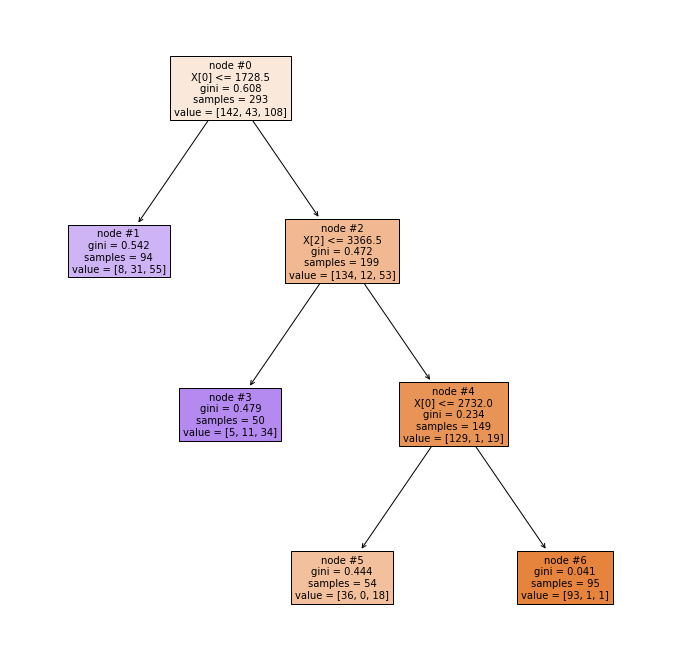

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(dt,node_ids=True,filled=True, fontsize=10)
plt.show()

In [ ]:
Segmento = mapeamento_sp
Segmento.loc[:,'cluster']= dt.apply(DF)

In [ ]:
Segmento[["cluster"]].value_counts(sort = False)

cluster
1          94
3          50
5          54
6          95
dtype: int64

In [ ]:
df_plot = Segmento.groupby('cluster').faturamento.mean().reset_index()
df_plot

,cluster,faturamento
0,1,6.013993e+05
1,3,1.016564e+06
2,5,8.067679e+05
3,6,1.277490e+06


O faturamento médio do grupo 6 é o mais alto, seguido pelo grupo 3.  Todos os grupos tem a mesma faixa etária, mas a renda pode ser diferente. veremos.

In [ ]:
df_plot = Segmento.groupby('cluster').rendaMedia.mean().reset_index()
df_plot

,cluster,rendaMedia
0,1,1328.946809
1,3,6839.860000
2,5,2112.500000
3,6,6386.557895


Como previsto, a renda realmente influencia no consumo. Os dois grupos que geram maior faturamento, também apresentam maiores rendas.

In [ ]:
df_sp4 = Segmento.query('cluster == 6 & potencial == 0')
df_sp4 = df_sp4[['cluster', 'nome','potencial']]
df_sp4

,cluster,nome,potencial
161,6,Aclimação,0
165,6,Água Rasa,0
167,6,Alfredo Pujol,0
168,6,Alto Da Lapa,0
169,6,Alto Da Mooca,0
...,...,...,...
443,6,Vila Olímpia,0
445,6,Vila Prudente,0
448,6,Vila Santa Catarina,0
451,6,Vila Sônia,0


In [ ]:
df_sp5 = Segmento.query('cluster == 3 & potencial == 0')
df_sp5 = df_sp5[['cluster', 'nome','potencial']]
df_sp5

,cluster,nome,potencial
163,3,Água Branca,0
209,3,Chácara Flora,0
371,3,Puc,0
385,3,Santa Cruz,0
410,3,Vila Anglo Brasileira,0


In [ ]:
Bairros_ideais =pd.concat([df_sp4, df_sp5])
Bairros_ideais['potencial'] = Bairros_ideais['potencial'].replace([0],['Alto'])
Bairros_ideais

,cluster,nome,potencial
161,6,Aclimação,Alto
165,6,Água Rasa,Alto
167,6,Alfredo Pujol,Alto
168,6,Alto Da Lapa,Alto
169,6,Alto Da Mooca,Alto
...,...,...,...
163,3,Água Branca,Alto
209,3,Chácara Flora,Alto
371,3,Puc,Alto
385,3,Santa Cruz,Alto
